<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/FE_Trabalho_Integrado_RM351578.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Para podermos iniciar a analise do Dataset de Clientes devemos realizar a leitura da base de dados.

In [1]:
#Realizando o import das bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

In [71]:
#Agora vamos criar uma funcao para poder realizar o upload do arquivo no Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving dataset.txt to dataset (1).txt
Arquivo "dataset (1).txt" importado pelo usuário com tamanho de 8394946 bytes


In [72]:
#Como nao sabemos qual o enconde o arquivo foi gerado vamos investigar
import chardet
# Abre o arquivo em modo de leitura binária
with open('dataset.txt', 'rb') as arquivo:
    # Lê uma quantidade de bytes do arquivo para análise
    dados = arquivo.read()
    # Detecta o encoding dos dados
    resultado = chardet.detect(dados)

# Exibe o resultado
print("Encoding do arquivo:", resultado['encoding'])

Encoding do arquivo: ISO-8859-1


In [97]:
#Vamos agora ler os dados do arquivo importado com o encoding ISO-8859-1
df_clientes = pd.read_csv('dataset.txt',delimiter='\t',encoding='ISO-8859-1',header=None)

<ipython-input-97-d55eb56d76ea>:2: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clientes = pd.read_csv('dataset.txt',delimiter='\t',encoding='ISO-8859-1',header=None)


In [99]:
#Vamos verificar uma amostra dos dados para identificar se a leitura foi realizada de forma correta
df_clientes.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


Neste ponto ja obtivemos acesso aos dados da nossa base de dados de clientes.
Ao visualizar um trecho das amostras ja identificamos o primeiro ponto a se tratar, as variaveis estao sem rotulos. Recebemos um segundo arquivo com o descritivo das variaveis. Agora vamos realizar o carregamento deste arquivo e setar os rotulos no nosso data frame de clientes.

In [64]:
#Lendo o arquivo de descritivo de rotulos das variaveis
uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo "{name}" importado pelo usuário com tamanho de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving descritivo_características.xlsx to descritivo_características (2).xlsx
Arquivo "descritivo_características (2).xlsx" importado pelo usuário com tamanho de 13768 bytes


In [100]:
#Criando o Dataframe com os rotulos
df_descritivo_rotulos_clientes = pd.read_excel('descritivo_características.xlsx')

In [101]:
#Vamos verificar os dados
df_descritivo_rotulos_clientes.head()

,Var_Id,Característica,Descrição
0,1,ID_CLIENTE,Número sequencial para o requerente (a ser usa...
1,2,TIPO_FUNCIONARIO,Não informado
2,3,DIA_PAGAMENTO,"Dia do mês para o pagamento da fatura, escolhi..."
3,4,TIPO_ENVIO_APLICACAO,Indica se a aplicação foi submetida via intern...
4,5,QUANT_CARTOES_ADICIONAIS,Quantidade de cartões adicionais solicitados n...


Apos avaliar os dados dos descritivos identificamos que o rotulo das nossas variaveis estao descritas na coluna Caracteristica do arquivo descritivo dos dados, vamos entao separala em um novo dataframe, realizar o pivot dos dados e realizar um append na primeira linha do nosso data frame de clientes.

In [102]:
#Separando apenas as colunas que identificam os rotulos
df_rotulos = df_descritivo_rotulos_clientes['Característica']
df_rotulos.head()

0                  ID_CLIENTE
1            TIPO_FUNCIONARIO
2               DIA_PAGAMENTO
3        TIPO_ENVIO_APLICACAO
4    QUANT_CARTOES_ADICIONAIS
Name: Característica, dtype: object

In [103]:
#Vamos agora transformar a coluna caracteristica nos rotulos das colunas
# porem primeiro vamos transformar os rotulos em um data frame
import pandas as pd
df_rotulos = pd.DataFrame(df_rotulos)
df_rotulos.head()

,Característica
0,ID_CLIENTE
1,TIPO_FUNCIONARIO
2,DIA_PAGAMENTO
3,TIPO_ENVIO_APLICACAO
4,QUANT_CARTOES_ADICIONAIS


In [104]:
#Pronto agora apenas vamos setar os rotulos das colunas no dataframe de clientes
df_clientes = df_clientes.rename(columns= df_rotulos['Característica'])
df_clientes.head()


,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,...,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ROTULO_ALVO_MAU=1
0,1,C,5,Web,0,1,F,6,1,0,...,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,...,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,...,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,...,0,0,0,0,1,N,48,235,235,1


Agora temos nossos dados carregados e rotulados, vamos iniciar a analise das features

Vamos iniciar a analise pela nossa variavel alvo que nos informa se o cliente e bom ou mau pagador, na nossa base o rotulo e ROTULO_ALVO_MAU=1 sendo o valor 1 para mau pagador e 0 para bom pagador.
Primeiro vamos verificar se realmente tratase de uma feature binaria

<ipython-input-105-fbce98a5c1ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ROTULO_ALVO_MAU=1',data=df_clientes,palette='hls')


<Axes: xlabel='ROTULO_ALVO_MAU=1', ylabel='count'>

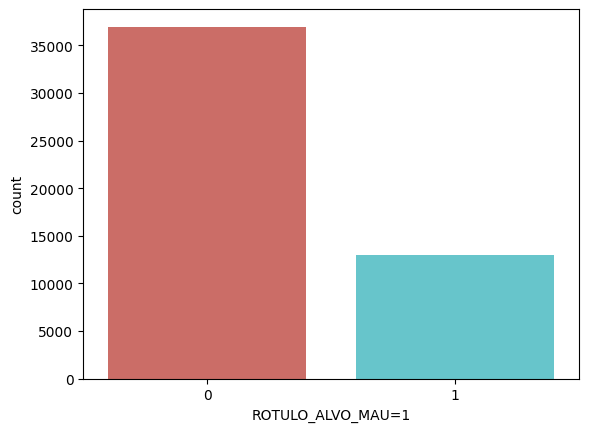

In [105]:
#Vamos plotar um contplot para verificar se a variavel e binaria e sua distribuicao
sns.countplot(x='ROTULO_ALVO_MAU=1',data=df_clientes,palette='hls')

Na sequencia vamos verificar a incidencia de nulos na nossa base

In [106]:
#Verificando os nan na base de clientes
df_clientes.isnull().sum()

ID_CLIENTE                               0
TIPO_FUNCIONARIO                         0
DIA_PAGAMENTO                            0
TIPO_ENVIO_APLICACAO                     0
QUANT_CARTOES_ADICIONAIS                 0
TIPO_ENDERECO_POSTAL                     0
SEXO                                     0
ESTADO_CIVIL                             0
QUANT_DEPENDENTES                        0
NIVEL_EDUCACIONAL                        0
ESTADO_NASCIMENTO                        0
CIDADE_NASCIMENTO                        0
NACIONALIDADE                            0
ESTADO_RESIDENCIAL                       0
CIDADE_RESIDENCIAL                       0
BAIRRO_RESIDENCIAL                       0
FLAG_TELEFONE_RESIDENCIAL                0
CODIGO_AREA_TELEFONE_RESIDENCIAL         0
TIPO_RESIDENCIA                       1349
MESES_RESIDENCIA                      3777
FLAG_TELEFONE_MOVEL                      0
FLAG_EMAIL                               0
RENDA_PESSOAL_MENSAL                     0
OUTRAS_REND

In [107]:
#Vamos tambem verificar o tipo das features da base
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENTE                         50000 non-null  int64  
 1   TIPO_FUNCIONARIO                   50000 non-null  object 
 2   DIA_PAGAMENTO                      50000 non-null  int64  
 3   TIPO_ENVIO_APLICACAO               50000 non-null  object 
 4   QUANT_CARTOES_ADICIONAIS           50000 non-null  int64  
 5   TIPO_ENDERECO_POSTAL               50000 non-null  int64  
 6   SEXO                               50000 non-null  object 
 7   ESTADO_CIVIL                       50000 non-null  int64  
 8   QUANT_DEPENDENTES                  50000 non-null  int64  
 9   NIVEL_EDUCACIONAL                  50000 non-null  int64  
 10  ESTADO_NASCIMENTO                  50000 non-null  object 
 11  CIDADE_NASCIMENTO                  50000 non-null  obj

Vamos iniciar removendo todas as variaveis que consideramos nao sao relevantes para nosso modelo

In [112]:
#Removendo as features que nao sao relevantes para o modelo
df_clientes_rev = df_clientes
df_clientes_rev = df_clientes_rev.drop(['ID_CLIENTE'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENVIO_APLICACAO'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['TIPO_ENDERECO_POSTAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['ESTADO_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CIDADE_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_RESIDENCIAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['ESTADO_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CIDADE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['BAIRRO_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['FLAG_TELEFONE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CODIGO_AREA_TELEFONE_PROFISSIONAL'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CEP_RESIDENCIAL_3'],axis=1)
df_clientes_rev = df_clientes_rev.drop(['CEP_PROFISSIONAL_3'],axis=1)
df_clientes_rev.head()

,TIPO_FUNCIONARIO,DIA_PAGAMENTO,QUANT_CARTOES_ADICIONAIS,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,...,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,ROTULO_ALVO_MAU=1
0,C,5,0,F,6,1,0,RN,Assu,1,...,NaN,NaN,0,0,0,0,1,N,32,1
1,C,15,0,F,2,0,0,RJ,rio de janeiro,1,...,11.0,NaN,0,0,0,0,1,N,34,1
2,C,5,0,F,2,0,0,RN,GARANHUNS,1,...,NaN,NaN,0,0,0,0,1,N,27,0
3,C,20,0,F,2,0,0,PE,CABO,1,...,NaN,NaN,0,0,0,0,1,N,61,0
4,C,10,0,M,2,0,0,RJ,RIO DE JANEIRO,1,...,NaN,NaN,0,0,0,0,1,N,48,1


Identificamos que as features abaixo contem valores nulos
> TIPO_RESIDENCIA                       1349

> MESES_RESIDENCIA                      3777

> CIDADE_PROFISSIONAL                  33783

> BAIRRO_PROFISSIONAL                  33783

> CODIGO_PROFISSAO                      7756

> TIPO_OCUPACAO                         7313

> CODIGO_PROFISSAO_CONJUGE             28884

> NIVEL_EDUCACIONAL_CONJUGE            32338

Vamos iniciar o tratamento idividual de cada uma delas

As features

CIDADE_PROFISSIONAL 33783

BAIRRO_PROFISSIONAL 33783

Foram removidas pois possuiam nulos e nao eram relavantes para o modelo


Vamos iniciar a analise da feature TIPO_RESIDENCIA

In [113]:
#Visualisando os dados
df_clientes_rev.TIPO_RESIDENCIA.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50000 entries, 0 to 49999
Series name: TIPO_RESIDENCIA
Non-Null Count  Dtype  
--------------  -----  
48651 non-null  float64
dtypes: float64(1)
memory usage: 390.8 KB


In [116]:
#Vamos verificar quais diferentes tipos de dados temos na feature
df_clientes_rev.TIPO_RESIDENCIA.unique()

array([ 1., nan,  2.,  5.,  0.,  3.,  4.])

In [ ]:
#Vamos agora ver como esses tipos se comportam em relacao a feature alvo
sns.boxplot()